In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as train_test_split
import seaborn as sns


In [2]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [4]:
df['relatives']=df['SibSp']+df['Parch']
df.loc[df['relatives']>0,'relatives']=1
df.loc[df['relatives']==0,'relatives']=0
df['relatives'].value_counts()



relatives
0    537
1    354
Name: count, dtype: int64

In [5]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df.dropna(subset=['Embarked'],inplace=True)


In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Sex']=label_encoder.fit_transform(df["Sex"])
print(label_encoder.classes_)
df['Embarked']=label_encoder.fit_transform(df["Embarked"])
print(label_encoder.classes_)



['female' 'male']
['C' 'Q' 'S']


In [8]:
x=df[['Pclass','Sex','Age','Embarked','relatives','SibSp','Parch']]
y=df[['Survived']]

In [9]:
from imblearn .over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x,y=smote.fit_resample(x,y)
y.value_counts()

Survived
0           549
1           549
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred=model.predict(x_test)
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       114
           1       0.85      0.86      0.85       106

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220



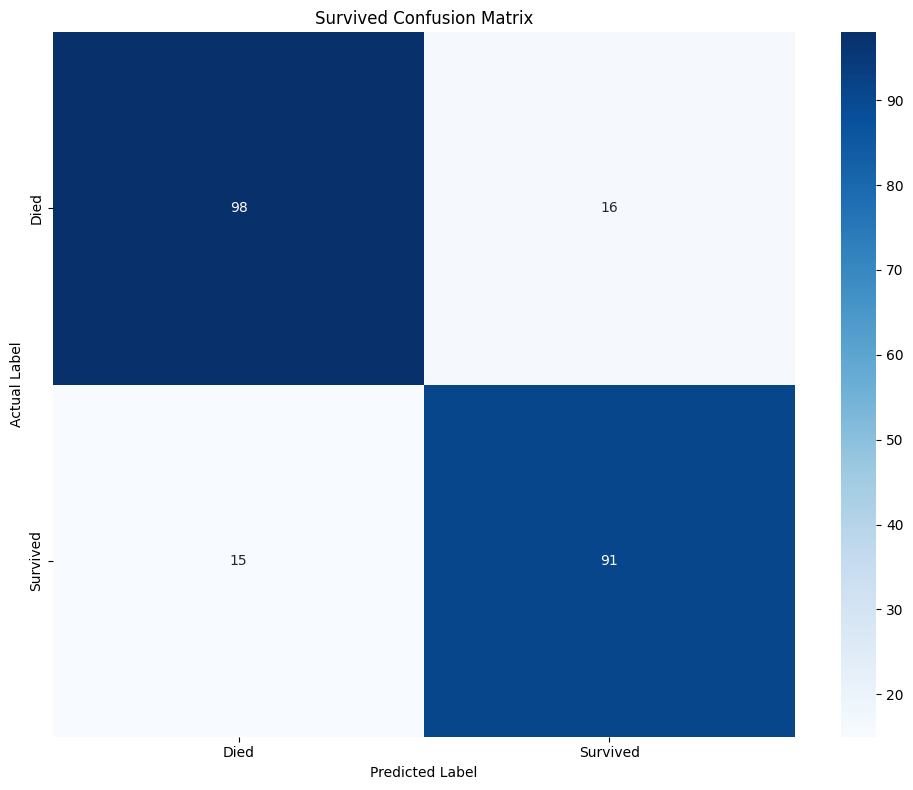

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm_model = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm_model, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Died', 'Survived'], 
            yticklabels=['Died', 'Survived'])

# Set titles and labels
plt.title("Survived Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# Adjust layout and show
plt.tight_layout()
plt.show()